# Mathematik für Biologiestudierende

Wintersemester 2024/25

15.01.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

# Themen heute

* Wiederholung t-Tests
* p-Wert
* Z-Test
* Power-Analyse

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()

# Anatomie eines Tests

(gilt nicht für den Binomialtest)

### Teststatistik

* berechnet sich aus den Daten
* führt zu einer Zahl, gennant **Teststatistik**, meist abgekürzt mit $t$
* $t=0$ bedeutet: überhaupt kein Unterschied zwischen Daten und Nullhypothese


### Entscheidungsregel

* benötigt wird ein **Quantil** 
* zu welcher Verteilung das Quantil bestimmt werden muss, hängt vom Test ab
* zweiseitiger Test:  Die Nullhypothese wird abgelehnt, wenn $|t|$ größer als das Quantil ist
* einseitiger oberer Test:  Die Nullhypothese wird abgelehnt, wenn $t$ größer als das Quantil ist
* einseitiger unterer Test:  Die Nullhypothese wird abgelehnt, wenn $-t$ größer als das Quantil ist

Zusammenfassung:  Die Nullhypothese wird abgelehnt, wenn die Teststatistik weit genug weg von der Null ist, wobei bei den einseitigen darauf geachtet werden muss, dass sie "in die richtige Richtung zeigt"

# $t$-Tests für Erwartungswerte

Wiederholung aus der vorigen Stunde

### $t$-Test für unverbundene Stichproben

* $x_j$ und $y_j$ seien Realisierungen, also die Daten
* Bestimme arithmetische Mittelwerte 
$$      \overline x = \frac1{n_1} \sum_{j=1}^{n_1} x_j 
\text{ und } \overline y = \frac1{n_2} \sum_{j=1}^{n_2} y_j $$

* die Stichprobenstreuungen

$$  s_x = \sqrt{ \frac1{n_1-1} \sum_{j=1}^{n_1} (x_j - \overline x)^2 } \text{ und } 
        s_y = \sqrt{ \frac1{n_2-1} \sum_{j=1}^{n_2} (y_j - \overline y)^2 }  $$

        
* Bestimme die *Standardabweichung der gepoolten Stichproben*

$$       s_p = \sqrt{ \frac{(n_1-1) \cdot s_x^2 + (n_2 - 1) \cdot
          s_y^2}{n_1 + n_2 - 2} }  $$

* Die Teststatistik ist

$$      t = \frac{\overline x - \overline y}{s_p} \sqrt{\frac{n_1
          \cdot n_2}{n_1 + n_2}}  $$

## Beispiel: Pinguine

In [2]:
df = sns.load_dataset("penguins") 
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


Unterscheiden sich die Flügellängen der Adelie-Pinguine je nach Geschlecht?

In [3]:
adelie = df[df.species=="Adelie"]
adelie

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,Male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


In [5]:
adelie.sex.value_counts()

sex
Male      73
Female    73
Name: count, dtype: int64

In [6]:
am = adelie[adelie.sex=="Male"]
af = adelie[adelie.sex=="Female"]

In [7]:
am.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,73.000000,73.000000,73.000000,73.000000
mean,40.390411,19.072603,192.410959,4043.493151
std,2.277131,1.018886,6.599317,346.811553
min,34.600000,17.000000,178.000000,3325.000000
25%,39.000000,18.500000,189.000000,3800.000000
50%,40.600000,18.900000,193.000000,4000.000000
75%,41.500000,19.600000,197.000000,4300.000000
max,46.000000,21.500000,210.000000,4775.000000


In [8]:
af.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,73.000000,73.000000,73.000000,73.000000
mean,37.257534,17.621918,187.794521,3368.835616
std,2.028883,0.942993,5.595035,269.380102
min,32.100000,15.500000,172.000000,2850.000000
25%,35.900000,17.000000,185.000000,3175.000000
50%,37.000000,17.600000,188.000000,3400.000000
75%,38.800000,18.300000,191.000000,3550.000000
max,42.200000,20.700000,202.000000,3900.000000


Standardabweichung der gepoolten Stichproben

$n_1-1 = 72$ und $n_2-1=72$

In [9]:
zaehler = 72*6.599**2 + 72*5.595**2
nenner = 72 + 72
sp = np.sqrt(zaehler/nenner)
sp

6.117631322660757

In [10]:
faktor = (73*73) / (73+73)
faktor

36.5

Teststatistik

In [11]:
t = (192.4-187.8) / sp * np.sqrt(faktor)
t

4.542772238713508

Quantil für $\alpha=0.05$ 

Dann $1-\frac\alpha2 = 0.975$

In [12]:
P = stats.t(72+72)
P.ppf(0.975)

1.9765750658185364

Die Nullhypothese wird abgelehnt:  Männliche Adelie-Pinguine haben längere Flügel

## Dasselbe mit `stats`

In [13]:
stats.ttest_ind(am.flipper_length_mm, af.flipper_length_mm)

TtestResult(statistic=4.5588666963515765, pvalue=1.08977531716496e-05, df=144.0)

Die Werte der Teststatistik unterscheiden sich!

Woran liegt das?

Rundungsfehler

In [16]:
zaehler = 72*am.flipper_length_mm.std()**2 + 72*af.flipper_length_mm.std()**2
nenner = 72 + 72
sp = np.sqrt(zaehler/nenner)
sp

6.117818375391429

In [17]:
t = (am.flipper_length_mm.mean()-af.flipper_length_mm.mean()) / sp * np.sqrt(faktor)
t

4.5588666963515765

Zum Vergleich

In [18]:
stats.ttest_ind(am.flipper_length_mm, af.flipper_length_mm).statistic

4.5588666963515765

# Der p-Wert

* Der p-Wert ist das kleinste Signifikanzniveau, zu dem die Nullhypothese noch abgelehnt werden kann
* Um ihn zu bestimmen, benötigen wir die Verteilungsfunktion der Statistik
* wir bezeichnen sie mal kurz mit $F$
* in scipy erhalten wir sie durch `P.cdf()`

* eim einseitigen oberen Test ist der p-Wert gleich $1 - F(t)$
* beim einseitigen unteren Test ist der p-Wert gleich $1 - F(-t)$
* beim zweiseitigen Test ist der p-Wert gleich $2(1 - F(|t|)$

Zurück zum Pinguin-Beispiel

In [19]:
2*(1 - P.cdf(abs(t)))

1.0897753171645874e-05

zum Vergleich

In [20]:
stats.ttest_ind(am.flipper_length_mm, af.flipper_length_mm).pvalue

1.08977531716496e-05

### Beispiel:  Schadstoffkonzentration

In [21]:
u = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
df = pd.read_csv(u, index_col=0)
df['referenz'] = 0.08 / 100
df.head()

,Messstelle,Konzentration,referenz
0,5,0.000867,0.0008
1,3,0.000490,0.0008
2,1,0.000589,0.0008
3,1,0.000950,0.0008
4,4,0.001152,0.0008


In [22]:
res = stats.ttest_rel(df.Konzentration, df.referenz, alternative="greater")
res.pvalue

0.0035114445640696246

In [23]:
df['z'] = df.Konzentration - df.referenz
df.describe()

,Messstelle,Konzentration,referenz,z
count,80.000000,80.000000,8.000000e+01,80.000000
mean,2.987500,0.000905,8.000000e-04,0.000105
std,1.409675,0.000341,1.091043e-19,0.000341
min,1.000000,0.000061,8.000000e-04,-0.000739
25%,2.000000,0.000701,8.000000e-04,-0.000099
50%,3.000000,0.000938,8.000000e-04,0.000138
75%,4.000000,0.001158,8.000000e-04,0.000358
max,5.000000,0.001605,8.000000e-04,0.000805


In [24]:
t = 0.000105 / 0.000341 * np.sqrt(80)
t

2.7541013212607384

In [25]:
res.statistic

2.768040010585661

* einseitig oberer Test
* 79 Freiheitsgrade

In [26]:
P = stats.t(79)

In [27]:
1 - P.cdf(t)

0.003650577575303182

In [28]:
res.pvalue

0.0035114445640696246

Unterschiede beruhen auf Rundungsfehlern

# Z-Test zum Vergleich zweier Erwartungswerte bei verbundenen Stichproben

* Gegeben sind Zufallsvariable $X_1, \dots, X_n$ und $Y_1, \dots, Y_n$
* Verteilungsvoraussetzungen:
  * Alle $X_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_1$ und *bekannter* Varianz $\sigma^2$
  * Alle $Y_j$ sind normalverteilt mit unbekanntem Erwartungswert $\mu_2$ und *bekannter* Varianz $\sigma^2$
  * Die beiden Varianzen müssen also gleich und bekannt sein (unrealistisch)
* Ziel: $\mu_1$ und $\mu_2$ sollen verglichen werden

* $x_j$ und $ _j$ seien Realisierungen (d.h., die Daten)
* $z_j = x_j - y_j$ seien die Differenzen
* Bestimme arithmetischen Mittelwert
$$      \overline z = \frac1n \sum_{j=1}^n z_j   $$

* Die *Teststatistik* ist
$$        t = \frac{\overline z}\sigma \cdot \sqrt{n}  $$
* also dieselbe wie beim t-Test für verbundene Stichproben
* Die Teststatistik wird mit einem Quantil der Standardnormalverteilung verglichen (anstelle eines Quantils der t-Verteilung mit der richtigen Anzahl an Freiheitsgraden
* bei großen Stichprobenumfängen ist der Unterschied gering

# Effektstärke

* Ein Medikament soll bei einer fortschreitenden Bewegungserkrankung die Verschlechterung aufhalten
* 900 Patienten bekommen das Verum, weitere 900 ein Placebo
* Zu den Zeitpunkten $t_0$ (Anfangszeitpunkt) und $t_1$ (Endzeitpunkt) wird die Beweglichkeit durch geschultes Personal auf einer Skala von 1 (schlecht) bis 100 (perfekt) eingeordnet.  

In [29]:
df = pd.read_csv('treatment.csv', index_col=0)
df

,t0,t1,Treatment,Difference
0,63.0,62.0,Verum,-1.0
1,24.0,22.0,Verum,-2.0
2,77.0,72.0,Verum,-5.0
3,43.0,41.0,Verum,-2.0
4,88.0,84.0,Verum,-4.0
...,...,...,...,...
1764,62.0,53.0,Placebo,-9.0
1765,54.0,56.0,Placebo,2.0
1766,57.0,52.0,Placebo,-5.0
1767,95.0,93.0,Placebo,-2.0


* In der Spalte "Difference" steht die Differenz zwischen den beiden Zeitpunkten.  Idealerweise ist sie positiv, wenn das Medikament die Verschlechterung sogar umkehrt.
* Jedenfalls soll der Test zeigen, dass die Differenz bei den Probanden mit Verum im Mittel größer als bei den anderen ist
* Einseitiger, unverbundener Test

In [30]:
dfv = df[df.Treatment=='Verum']
dfv.describe()

,t0,t1,Difference
count,887.000000,887.000000,887.000000
mean,61.073281,57.054115,-4.019166
std,20.169044,20.405522,3.093843
min,5.000000,1.000000,-15.000000
25%,47.000000,43.000000,-6.000000
50%,61.000000,57.000000,-4.000000
75%,75.000000,71.000000,-2.000000
max,100.000000,100.000000,5.000000


In [31]:
dfp = df[df.Treatment=='Placebo']
dfp.describe()

,t0,t1,Difference
count,882.000000,882.000000,882.000000
mean,63.548753,59.189342,-4.359410
std,20.061947,20.266874,3.089117
min,0.000000,0.000000,-13.000000
25%,50.000000,45.000000,-6.000000
50%,64.000000,60.000000,-4.000000
75%,78.000000,74.000000,-2.000000
max,100.000000,100.000000,5.000000


* Aus der Gruppe der Probanden mit Verum sind 13 Leute ausgeschieden
* aus der anderen 18

In [32]:
stats.ttest_ind(dfv.Difference, dfp.Difference, alternative='greater')

TtestResult(statistic=2.314493969317715, pvalue=0.010377396661800722, df=1767.0)

Die Nullhypothese, dass das Medikament nicht besser wirkt als Placebo, kann zum Signifikanzniveau $\alpha=0.011$ abgelehnt werden. 

# Effektstärke

Beim Vergleich zweier Mittelwerte kann "Cohen's d" zur Messung der Effektstärke verwendet werden.  

$$
    d = \left| \frac{\overline x - \overline y}s \right|
$$

wobei $\overline x$ und $\overline y$ die beiden Mittelwerte, $s$ die Stichprobenstreuung und $|a|$ den Betrag von $a$ bezeichnet.

* Bei verbundenen Stichproben verwendet man die Stichprobenstreuung der Differenz
* Bei unverbundenen Stichproben verwendet man die Standardabweichung der gepoolten Stichproben

In [33]:
n1 = dfv.Difference.count()
n2 = dfp.Difference.count()
n1, n2

(887, 882)

In [34]:
xq = dfv.Difference.mean()
yq = dfp.Difference.mean()
xq, yq

(-4.019165727170237, -4.359410430839002)

In [35]:
sx = dfv.Difference.std()
sy = dfp.Difference.std()
sx, sy

(3.0938434063949605, 3.0891165720500093)

In [36]:
zaehler = (n1-1)*sx**2 + (n2-1)*sy**2
nenner = n1+n2-2
sp = np.sqrt(zaehler/nenner)
sp

3.091487580276714

In [37]:
d = (xq - yq) / sp
d

0.11005857045633367

### Interpretation der Effektgröße

| d-Wert | Interpretation   |
|--------|------------------|
| 0.2    | geringer Effekt  |
| 0.5    | mittlerer Effekt |
| 0.8    | starker Effekt   |

Wir haben also einen geringen Effekt beobachtet

# Power-Analyse

Power:  Wahrscheinlichkeit, dass die Nullhypothese abgelehnt wird, wenn tatsächlich die Alternative gilt

Bauer Pillenhuber wird verdächtigt, seine Bio-Hühnchen mit Antibiotika vollzudröhnen.  Wir wollen das durch Blutuntersuchungen nachweisen.  

* Es handelt sich um den Vergleich mit einem Referenzwert, also einen verbundenen t-Test
* Er ist einseitig

* Wie viele Tiere müssen untersucht werden?
* Wir erwarten einen starken Effekt, sagen wir d=0.7
* Wir verlangen ein Signifikanzniveau von $\alpha=0.01$, um niemanden zu Unrecht zu verdächtigen

In [38]:
import statsmodels.stats.power as smp   

In [39]:
poweranalyse = smp.TTestPower()

In [42]:
poweranalyse.power(effect_size=0.7, alpha=0.01, nobs=10, alternative="larger")

0.3306090902052323

* `nobs`: number of observations
* `effect_size`: erwartete Effektstärke
* `alpha`: Signifikanzniveau
* Rückgabewert:  Power unter Zugrundelegung dieser Daten

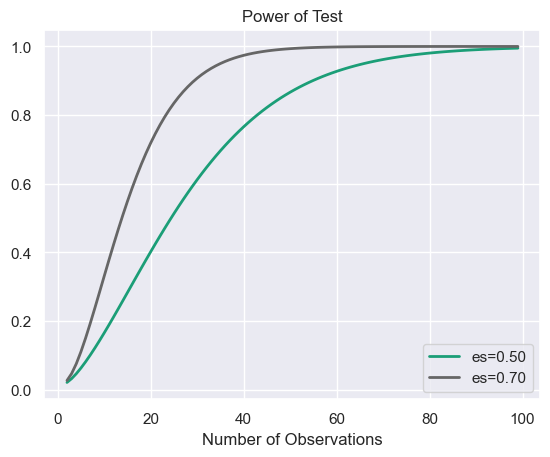

In [44]:
poweranalyse.plot_power(effect_size=[0.5,0.7], alpha=0.01, nobs=np.arange(2,100), 
                         alternative='larger');

Wir sollten 35 Hühner untersuchen

In [43]:
poweranalyse.power(effect_size=0.7, alpha=0.01, nobs=35, alternative='larger')

0.9502228513191198

## Power-Analyse für unverbundene t-Tests

* Wir wollen wissen, ob auf sandigem Boden das Verhältnis von Kiefern zu Fichten ein anderes als auf lehmigem ist
* Wir erwarten einen mittleren Effekt
* Wir wählen den Standardwert $\alpha=0.05$

* Es handelt sich um einen unverbundenen Test
* Sie wählen $n_1$ sandige und $n_2=n_1$ lehmige Waldparzellen aus
* Wie groß müssen $n_1$ und $n_2$ sein?

In [45]:
poweranalyse = smp.TTestIndPower()  # Ind = Independent

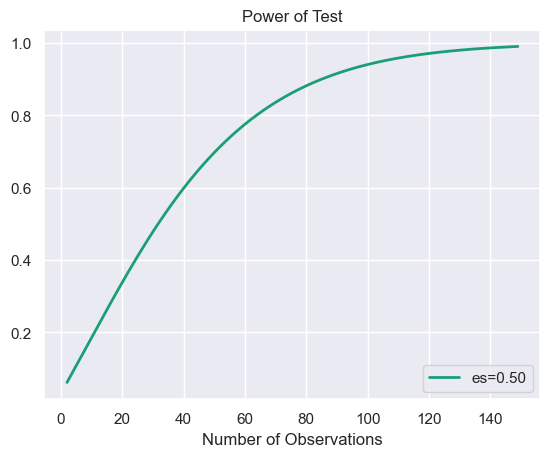

In [46]:
poweranalyse.plot_power(effect_size=[0.5], alpha=0.05, nobs=np.arange(2,150));

Wir müssen ca 100 Parzellen von jeder Sorte ansehen, um eine Power von knapp 95% zu erreichen

In [49]:
poweranalyse.power(effect_size=0.5, alpha=0.05, nobs1=100, ratio=1)

0.9404271933839895

* `ratio` ist das Verhältnis $\frac{n_2}{n_1}$
* Man plant eigentlich immer mit `ratio=1`
* Dann kann man diese Angabe bei `poweranalyse.power` weglassen